In [13]:
import pandas as pd
import json
import numpy as np

In [4]:
with open(f'step_scores.json') as f:
    step_scores = json.load(f)

In [40]:
rand_state = 42
score_dict = {}
student_ct = 0
for residency in step_scores.keys():
    step1_scores = []
    step2_scores = []
    for step1 in step_scores[residency].keys():
        step1_range = step1.split('-')
        step1_low = int(step1_range[0])
        for step2 in step_scores[residency][step1].keys():
            score_ct = step_scores[residency][step1][step2]
            step2_range = step2.split('-')
            step2_low = int(step2_range[0])
            step1_scores = list(np.random.RandomState(rand_state).randint(step1_low,step1_low+10,score_ct))
            step2_scores = list(np.random.RandomState(rand_state).randint(step2_low,step2_low+10,score_ct))
            for i in range(len(step1_scores)):
                score_dict[student_ct] = {'step1':step1_scores[i],'step2':step2_scores[i],'residency':residency}
                student_ct += 1

In [42]:
step_scores_df = pd.DataFrame.from_dict(score_dict, orient='index')
step_scores_df.head()

,step1,step2,residency
0,266,236,anesthesiology
1,263,233,anesthesiology
2,266,246,anesthesiology
3,263,243,anesthesiology
4,267,247,anesthesiology


In [43]:
step_scores_df.shape

(22278, 3)

In [49]:
step_scores_df.residency.unique()

array(['anesthesiology', 'dermatology', 'EmergencyMedicine',
       'FamilyMedicine', 'InternalMedicine', 'MedicalGenetics',
       'NeurologicalSurgery', 'Neurology', 'NuclearMedicine',
       'ObstetricsGynecology', 'Ophthalmology', 'OrthopaedicSurgery',
       'Otolaryngology', 'PathologySnatomicClinical', 'Pediatrics',
       'PhysicalMedicineRehabilitation', 'PlasticSurgery',
       'PlasticSurgeryIntegrated', 'PreventiveMedicine', 'Psychiatry',
       'RadiationOncology', 'RadiationDiagnostic', 'RadiologyDiagnostic',
       'Surgery', 'ThoracicSurgeryIntegrated',
       'VascularSurgeryIntegrated', 'Urology',
       'InternalMedicinePediatrics'], dtype=object)

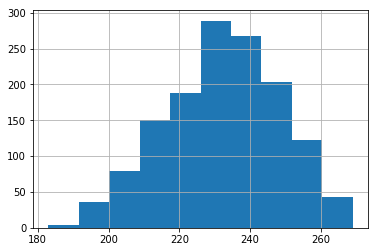

In [48]:
df = step_scores_df.loc[step_scores_df.residency=='anesthesiology','step1']
df.hist()

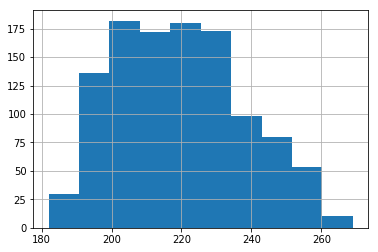

In [51]:
df = step_scores_df.loc[step_scores_df.residency=='Psychiatry','step1']
df.hist()